In [ ]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import sys # 到其他資料夾

from importlib import reload # 自訂 function 可重新 reload
sys.path.append('/home/hchuang/Documents/Project/SSSD_CP/src')
from utils import util_inference_result
reload(util_inference_result)
from utils.util_inference_result import *

sys.path.append('/home/hchuang/Documents/Project/SSSD_CP/src/datasets_script/NYISO')
from utils.data_utils import *

import skfda
from skfda import datasets
from skfda.exploratory.visualization.clustering import (
    ClusterMembershipLinesPlot,
    ClusterMembershipPlot,
    ClusterPlot,
)
from skfda.ml.clustering import FuzzyCMeans, KMeans

In [ ]:
main_folder_path = "/home/hchuang/Documents/Project/SSSD_CP/src/"
DATASET = 'dataset_4' # dataset_4 or dataset 6
result = load_result_data(main_folder_path, DATASET)

true_data_I2_all_o = result['true_data_I2_all_o']
true_data_I2_cond_o = result['true_data_I2_cond_o']
true_data_I2_target_o = result['true_data_I2_target_o']
true_data_I2_all = result['true_data_I2_all']
true_data_I2_cond = result['true_data_I2_cond']
true_data_I2_target = result['true_data_I2_target']
mul_pred_data_I2 = result['mul_pred_data_I2']
median_pred_data_I2 = result['median_pred_data_I2']
mul_pred_data_I2_o = result['mul_pred_data_I2_o']
median_pred_data_I2_o = result['median_pred_data_I2_o']
true_data_test_all_o = result['true_data_test_all_o']
true_data_test_cond_o = result['true_data_test_cond_o']
true_data_test_target_o = result['true_data_test_target_o']
true_data_test_all = result['true_data_test_all']
true_data_test_cond = result['true_data_test_cond']
true_data_test_target = result['true_data_test_target']
mul_pred_data_test = result['mul_pred_data_test']
median_pred_data_test = result['median_pred_data_test']
mul_pred_data_test_o = result['mul_pred_data_test_o']
median_pred_data_test_o = result['median_pred_data_test_o']

true_data_I2_all_o, shape: (2061, 192)
true_data_I2_cond_o, shape: (2061, 168)
true_data_I2_target_o, shape: (2061, 24)
true_data_I2_all, shape: (2061, 192)
true_data_I2_cond, shape: (2061, 168)
true_data_I2_target, shape: (2061, 24)
mul_pred_data_I2, shape: (50, 2061, 24)
median_pred_data_I2, shape: (2061, 24)
mul_pred_data_I2_o, shape: (50, 2061, 24)
median_pred_data_I2_o, shape: (2061, 24)
true_data_test_all_o, shape: (73, 192)
true_data_test_cond_o, shape: (73, 168)
true_data_test_target_o, shape: (73, 24)
true_data_test_all, shape: (73, 192)
true_data_test_cond, shape: (73, 168)
true_data_test_target, shape: (73, 24)
mul_pred_data_test, shape: (50, 73, 24)
median_pred_data_test, shape: (73, 24)
mul_pred_data_test_o, shape: (50, 73, 24)
median_pred_data_test_o, shape: (73, 24)


# 分群

In [5]:
num_cluster = 12

# // apply clustering on the previous 7 days
# data_pre = np.squeeze(true_data_I2_cond, axis = 1)
data_pre = true_data_I2_cond

grid_points = range(data_pre.shape[1])

fd = skfda.FDataGrid(data_pre, grid_points)
model = skfda.ml.clustering.KMeans(n_clusters=num_cluster, random_state=0)
model.fit(fd)
group_center = model.cluster_centers_.data_matrix # (n_clusters, # of length, ?)
group_fd = model.predict(fd)
count_group = np.bincount(group_fd, minlength=num_cluster) 


(2061, 192)


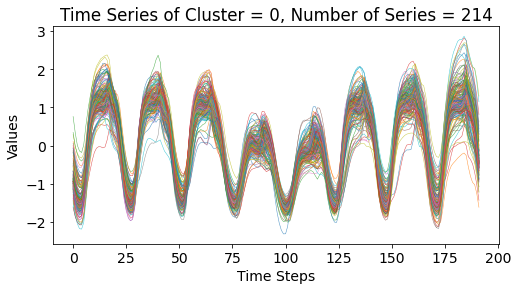

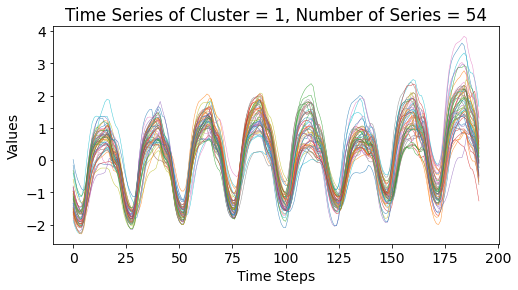

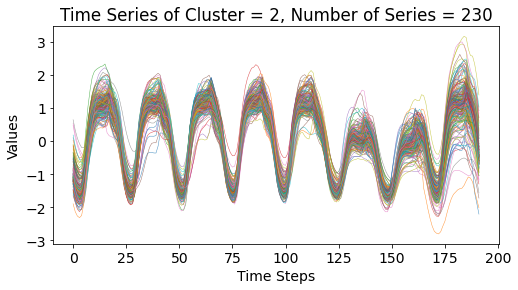

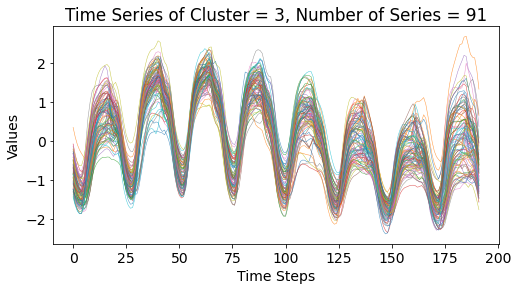

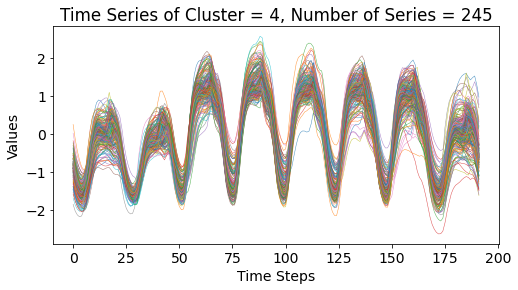

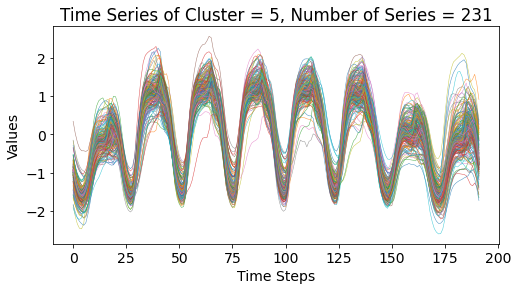

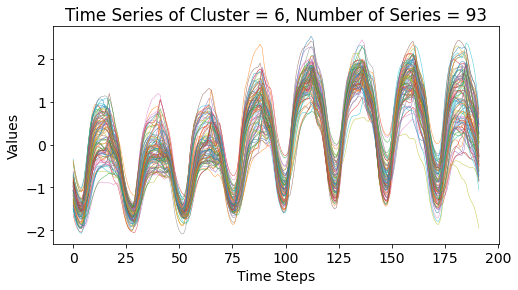

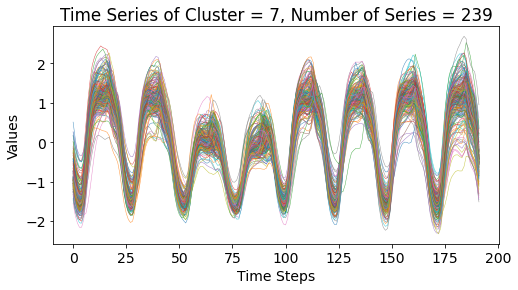

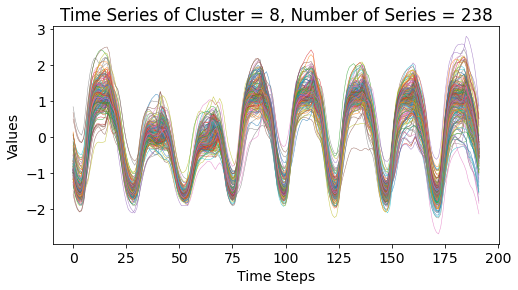

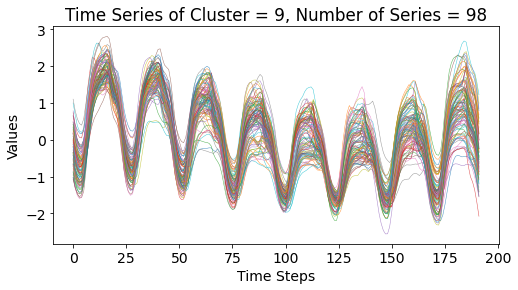

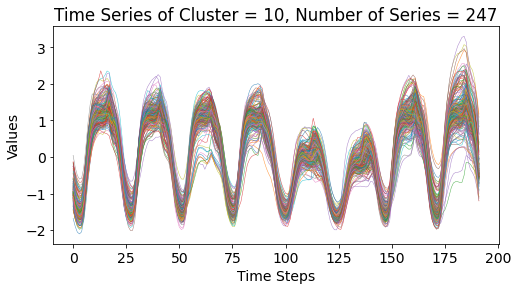

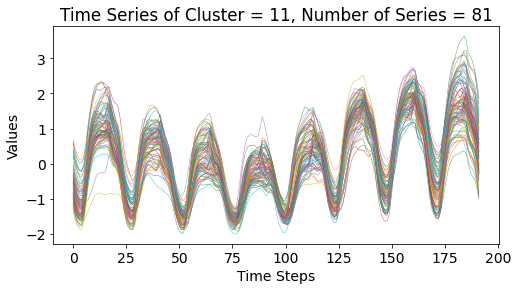

In [6]:
# d = np.squeeze(true_data_I2_all, axis = 1)
d = true_data_I2_all
print(d.shape)

for i in range(num_cluster):
    # 創建一個圖形和軸對象
    plt.figure(figsize=(8, 4))
    # 設置繪圖時的字體大小
    plt.rcParams['font.size'] = 14
    # 繪製每條時間序列
    for series in d[group_fd==i,:]:
        plt.plot(series, linewidth=0.5, alpha=0.8)  # alpha用於設置透明度，以便更好地視覺化重疊

    # 設置標題和軸標籤
    plt.title(f'Time Series of Cluster = {i}, Number of Series = {count_group[i]}')
    plt.xlabel('Time Steps')
    plt.ylabel('Values')
    # plt.ylim(-3.5,4)

    # 顯示圖表
    plt.show()

# 測試資料分群

In [ ]:
# // apply clustering on the previous 7 days
data_pre = np.squeeze(true_data_test_cond, axis = 1)

# // apply clustering on the predictions
# data = np.squeeze(pred_mean_test, axis = 1)
# data_pre = data[:,-24:] 

# // apply clustering on the previous 7 days + the predictions
# data1 = np.squeeze(true_data_test_all, axis = 1)
# data2 = np.squeeze(pred_mean_test, axis = 1)
# data_pre = np.concatenate((data1[:,0:-24], data2[:,-24:]), axis=1)

grid_points = range(data_pre.shape[1])

fd = skfda.FDataGrid(data_pre, grid_points)
group_fd = model.predict(fd) 
count_group = np.bincount(group_fd, minlength=num_cluster)  # minlength 确保数组长度至少为num_cluster，即使某些数字没有出现
count_group